In [1]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
spath = Path("../../../draft/figures/math/")

theme = themepy.Theme('paper')

%matplotlib inline

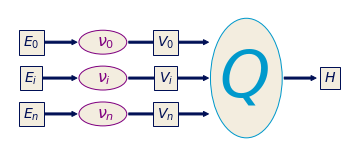

In [252]:
fig, ax = plt.subplots()

elabs = [r"$E_0$", r"$E_i$", r"$E_n$"][::-1]
nlabs = [r"$\nu_0$", r"$\nu_i$", r"$\nu_n$"][::-1]
vlabs = [r"$V_0$", r"$V_i$", r"$V_n$"][::-1]
# mutation_scale
for i, el, nl, vl in zip([0, 3, 6], elabs, nlabs, vlabs):
    p = mpatches.Ellipse((7, i+1), width=4, height=2, facecolor=ax.get_facecolor(), edgecolor='C4')
    ax.add_patch(p)
    ax.text(6.5,i+.75, nl, fontsize=16, color='C4')
    
    p1 = mpatches.FancyArrowPatch((9,i+1),(16, i+1), color='C8', mutation_scale=10)
    ax.add_patch(p1)
    ax.text(12.25, i+1, vl, fontsize=14, color='C8', 
             ha="center", va="center",
           bbox=dict(boxstyle="square",  ec='C8', fc=ax.get_facecolor()))
    ax.text(1, i+1, el, fontsize=14, color='C8', 
             ha="center", va="center",
           bbox=dict(boxstyle="square",  ec='C8', fc=ax.get_facecolor()))
    p3 = mpatches.FancyArrowPatch((0,i+1),(5, i+1), color='C8', mutation_scale=10)
    ax.add_patch(p3)

e = mpatches.Ellipse((19,4), width=6, height=10, facecolor=ax.get_facecolor(), edgecolor='#0099CC')
ax.add_patch(e)
ax.text(16.75,2.5,r'$Q$', fontsize=64, color='#0099CC')
p4 = mpatches.FancyArrowPatch((22, 4),(25,4), color='C8', mutation_scale=10)
ax.add_patch(p4)
ax.text(26,4, "$H$", fontsize=14, color='C8', 
        ha="center", va="center",
        bbox=dict(boxstyle="square",  ec='C8', fc=ax.get_facecolor()))
ax.set(xlim=(-1,27), ylim=(-2,10), aspect='equal')
ax.axis('off')
fig.savefig(spath/"path_of_q.png", bbox_inches='tight', facecolor='white' )

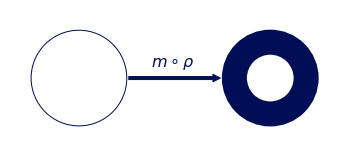

In [250]:
fig, ax = plt.subplots()

c1 = mpatches.Circle((-2,0), radius=2, facecolor='white', edgecolor="C0")
ax.add_patch(c1)
c2 = mpatches.Circle((6,0), radius=1.5, facecolor='white', edgecolor="C0", linewidth=25)
ax.add_patch(c2)
p4 = mpatches.FancyArrowPatch((0,0), (4,0), color='C8', mutation_scale=15)
ax.add_patch(p4)
ax.text(1,.5, r'$m\circ\rho$', color='C8', fontsize=16)
ax.set(xlim=(-5,9), ylim=(-3,3), aspect='equal')
ax.axis('off')
fig.savefig(spath/"diff_type_q.png", bbox_inches='tight', facecolor='white' )